In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from PIL import Image
from sixd import SixdBenchmark

In [3]:
def get_3D_corners(vertices):
    min_x = np.min(vertices[:, 0])
    max_x = np.max(vertices[:, 0])
    min_y = np.min(vertices[:, 1])
    max_y = np.max(vertices[:, 1])
    min_z = np.min(vertices[:, 2])
    max_z = np.max(vertices[:, 2])
    corners = np.array([[min_x, min_y, min_z],
                        [min_x, min_y, max_z],
                        [min_x, max_y, min_z],
                        [min_x, max_y, max_z],
                        [max_x, min_y, min_z],
                        [max_x, min_y, max_z],
                        [max_x, max_y, min_z],
                        [max_x, max_y, max_z]])
    return corners


In [4]:
bench = SixdBenchmark(dataset='hinterstoisser', unit=1e-3, is_train=True)

[LOG] Load SIXD from pkl file success


In [16]:
img = Image.open('/home/penggao/data/synthetic/sixd/images/00004.png')
annots = np.load('/home/penggao/data/synthetic/sixd/annot/00004.npy').item()
bboxes = annots['bboxes']
kps = annots['kps']
poses = annots['poses']
obj_ids = annots['obj_ids']

bboxes[:,2] -= bboxes[:,0]
bboxes[:,3] -= bboxes[:,1]

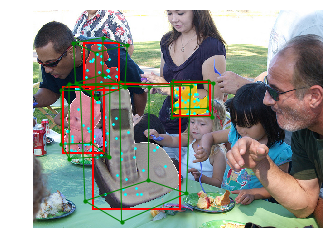

In [19]:
fig, ax = plt.subplots()
ax.imshow(img)
ax.axis('off')
    
for IDX in range(bboxes.shape[0]):

    models = bench.models['%02d' % annots['obj_ids'][IDX]]
    corners = get_3D_corners(models)

    corners = np.concatenate((corners, np.ones((corners.shape[0], 1))), axis=1)
    projected = np.matmul(np.matmul(bench.cam, poses[IDX]), corners.T)
    projected /= projected[2, :]
    projected = projected[:2, :].T

    edges_corners = (
        [0, 1], [0, 2], [0, 4], [1, 3], [1, 5], [2, 3],
        [2, 6], [3, 7], [4, 5], [4, 6], [5, 7], [6, 7]
    )
    ax.scatter(projected[:, 0], projected[:, 1], s=10, c='g')
    for edge in edges_corners:
        ax.plot(projected[edge, 0], projected[edge, 1], linewidth=1.0, c='g')

    bbox = bboxes[IDX]
    rect = mpatches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
    kp = kps[IDX]
    ax.scatter(kp[:,0], kp[:,1], c='aqua', marker='x', s=3)

plt.savefig('demo.png', dpi=300, bbox_inches='tight', pad_inches=0)

## Frames

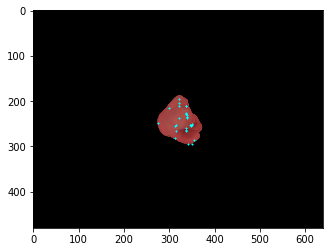

In [227]:
img = Image.open(bench.frames['01'][0]['path'])
kp = bench.frames['01'][0]['annots'][0]['kps']
fig, ax = plt.subplots()
plt.imshow(img)
ax.scatter(kp[:,0], kp[:,1], c='aqua', marker='x', s=1)
plt.show()

## Bounding boxes

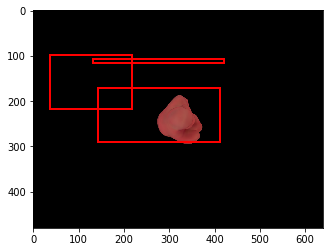

In [228]:
fig, ax = plt.subplots()
bboxes[:,2] -= bboxes[:,0]
bboxes[:,3] -= bboxes[:,1]
plt.imshow(img)
for bbox in bboxes:
    rect = mpatches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.show()

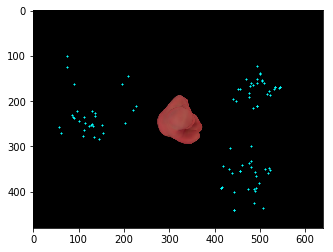

In [229]:
fig, ax = plt.subplots()
plt.imshow(img)
for kp in kps:
    ax.scatter(kp[:,0], kp[:,1], c='aqua', marker='x', s=1)
plt.show()

array([[ 8.31050950e-02, -4.93045175e-01,  0.00000000e+00,
        -0.00000000e+00],
       [-3.58264500e-01, -6.03871750e-02, -3.43511190e-01,
         0.00000000e+00],
       [ 3.38733070e-01,  5.70950600e-02, -3.63318125e-01,
         2.00000000e+02]])